In [1]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])
df_std[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [3]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scaler.transform(df[['Alcohol', 'Malic acid']])
df_minmax[:3]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ]])

In [4]:
print('Mean after standardization:\nAlcohol = {:.2f}, Malic acid = {:.2f}'.format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol = {:.2f}, Malic acid = {:.2f}'.format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol = -0.00, Malic acid = -0.00

Standard deviation after standardization:
Alcohol = 1.00, Malic acid = 1.00


In [5]:
print('Min-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'.format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'.format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol = 0.00, Malic acid = 0.00

Max-value after min-max scaling:
Alcohol = 1.00, Malic acid = 1.00


### MinMaxScaler와 StandardScaler를 사용해도 원본과 데이터 분포가 달라지지 않는다는 것을 증명

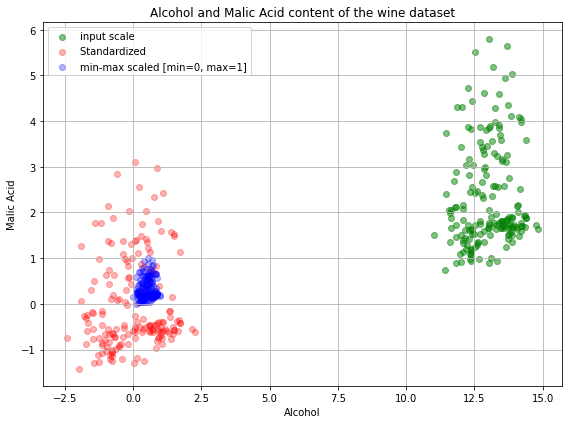

In [8]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize = (8, 6))

    plt.scatter(df['Alcohol'], df['Malic acid'], color='green', label='input scale', alpha=0.5)
    plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized ', alpha=0.3)
    plt.scatter(df_minmax[:,0], df_minmax[:,1], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()   # 적당한 크기로 자동 조절

plot()
plt.show()

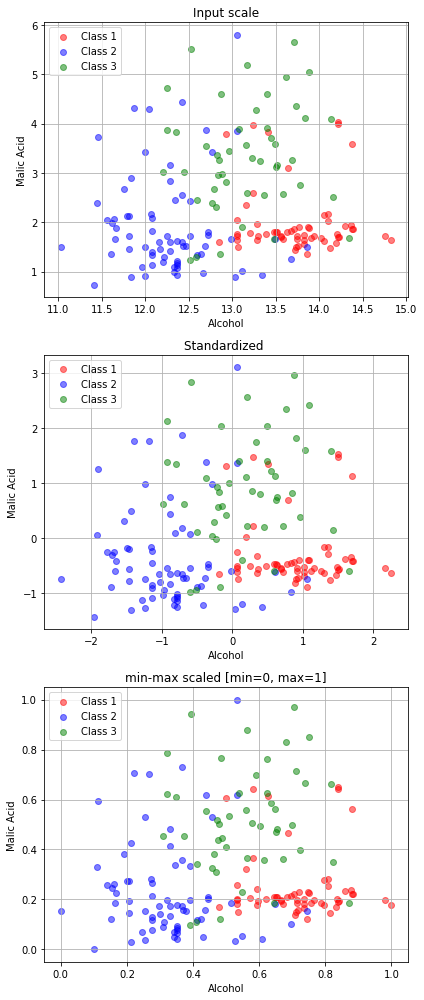

In [25]:
fig, ax = plt.subplots(3, figsize = (6, 14))

for axis, data, name in zip(range(len(ax)), 
                            (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax), 
                            ('Input scale', 'Standardized ', 'min-max scaled [min=0, max=1]')):
    for label_number, color in zip(range(1,4), ('red', 'blue', 'green')):
        ax[axis].scatter(data[df['Class label'].values == label_number, 0],
                         data[df['Class label'].values == label_number, 1],
                         alpha = 0.5,
                         color = color,
                         label = 'Class %s' %label_number)
    ax[axis].set_title(name)
    ax[axis].set_xlabel('Alcohol')
    ax[axis].set_ylabel('Malic Acid')
    ax[axis].legend(loc='upper left')
    ax[axis].grid()

plt.tight_layout()
plt.show()